# Simple Pendulum 
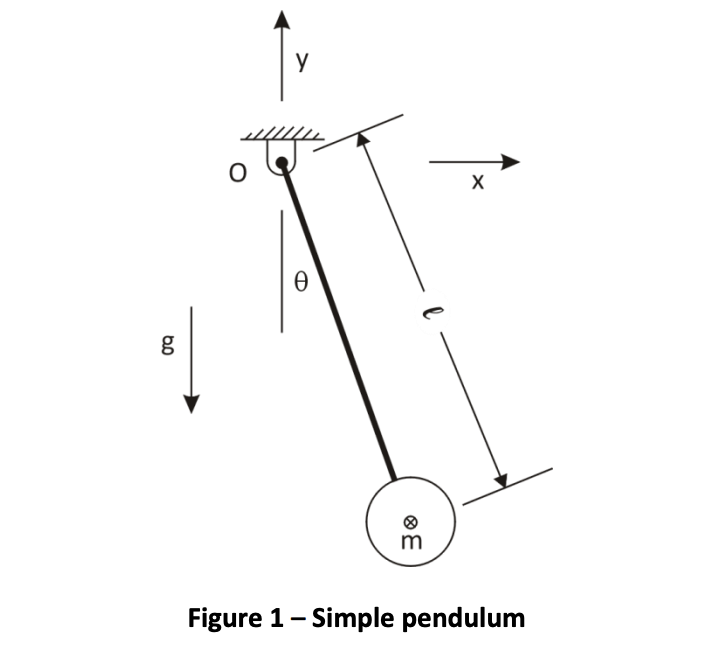

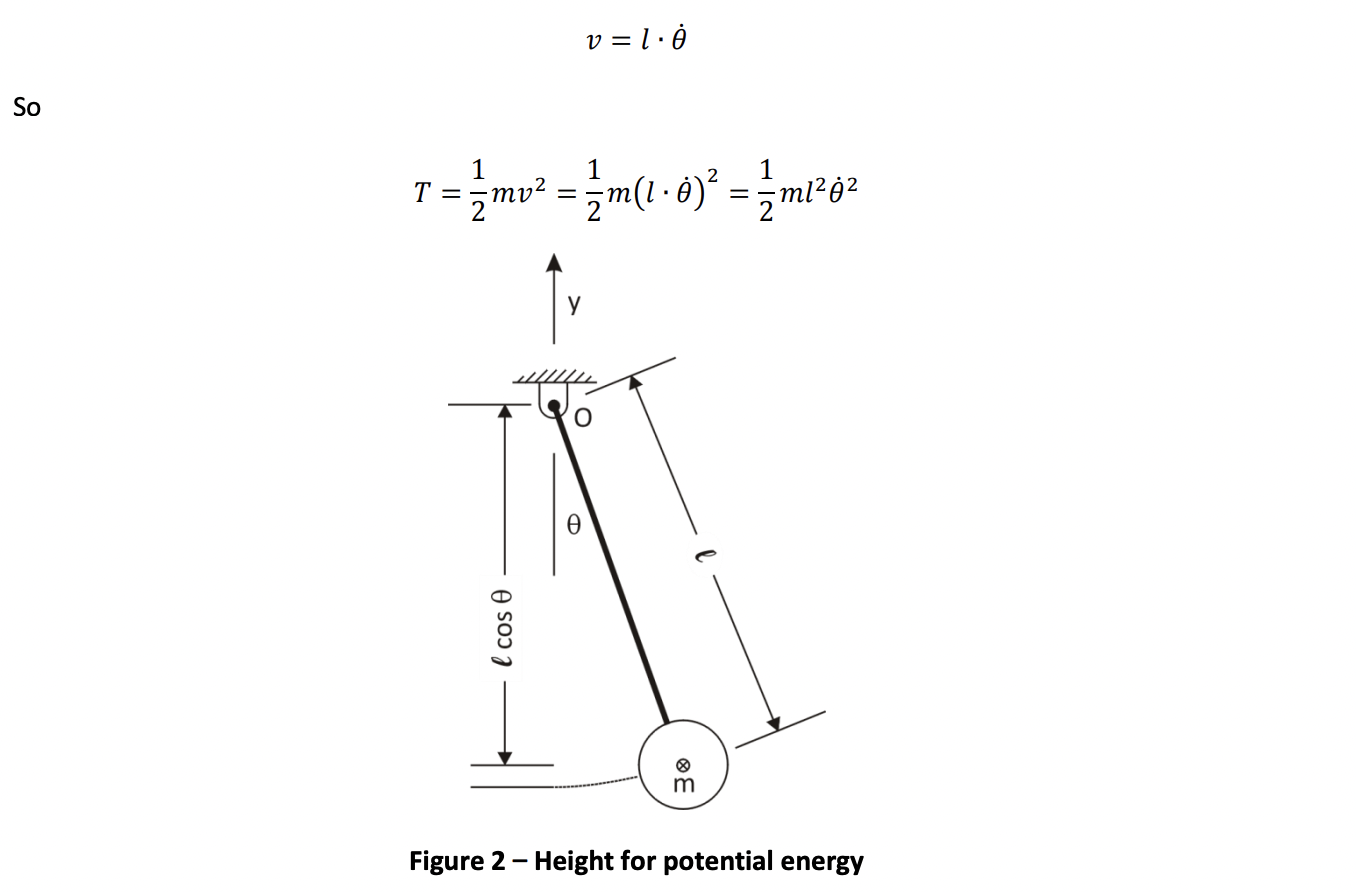

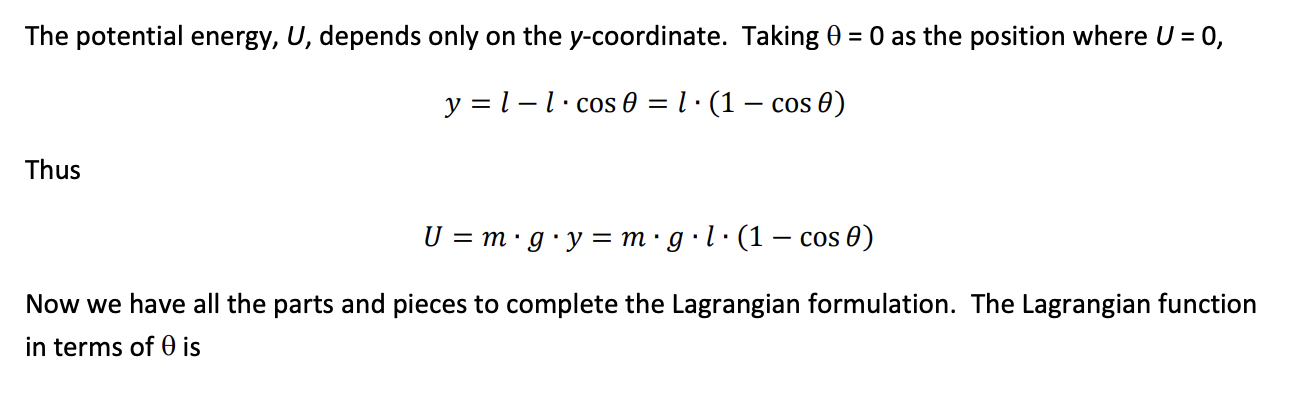

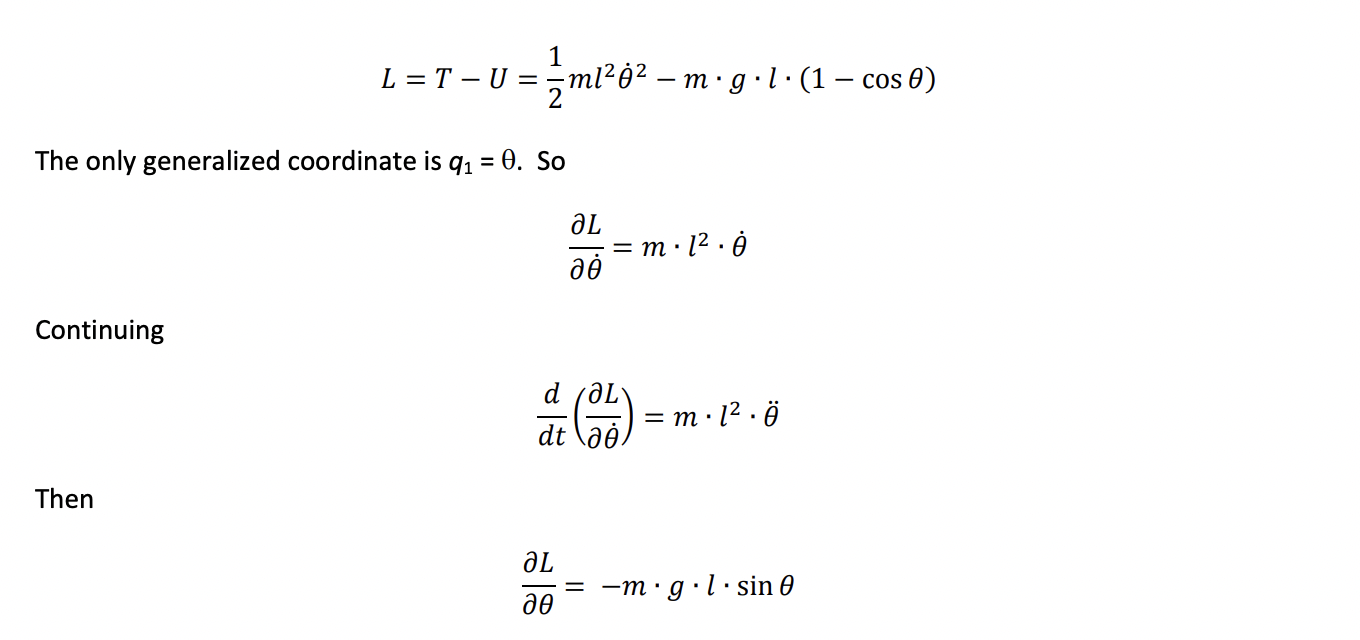

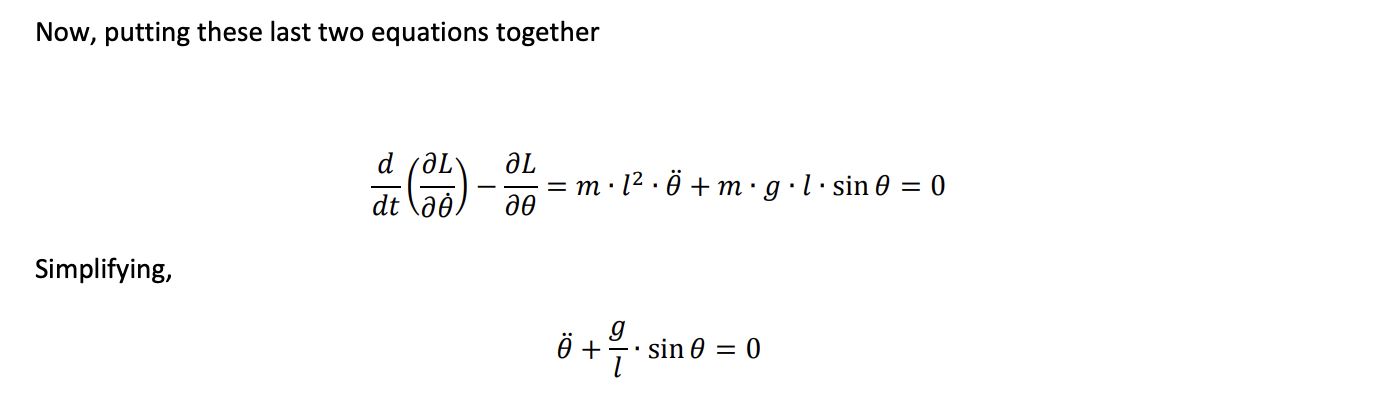

## Importing Modules

In [38]:
import numpy as np                                      # arrays 
import sympy as smp                                     # symbols 
from scipy.integrate import odeint                      # mathematical operations
import matplotlib.pyplot as plt                         # Ploting and visualization
from matplotlib import animation                        # for animation 
from mpl_toolkits.mplot3d import Axes3D                 # visualization
from matplotlib.animation import PillowWriter           # animation

# Langrangian Method

## Declaring variables

In [39]:
t, m, g = smp.symbols('t m g')                 
the = smp.symbols(r'\theta', cls=smp.Function)
the = the(t)

In [40]:
the_d = smp.diff(the, t)
the_dd = smp.diff(the_d, t)

In [41]:
the_dd

Derivative(\theta(t), (t, 2))

In [42]:
x, y = smp.symbols('x y', cls=smp.Function)
x = x(the)
y = y(the)

In [43]:
x = smp.sin(the)
y = (1 - smp.cos(the))
x_f = smp.lambdify(the, x)
y_f = smp.lambdify(the, y)  

# Kinetic and potential Energy

In [44]:
T = 1/2 * m * (smp.diff(x,t)**2 + smp.diff(y,t)**2)  # Kinetic Energy
V = m*g*y  # Potential Energy
L = T-V  # Langrangian of the system

In [45]:
smp.diff(x,t)

cos(\theta(t))*Derivative(\theta(t), t)

In [46]:
smp.diff(y,t)

sin(\theta(t))*Derivative(\theta(t), t)

# Langrangian of the System

In [47]:
L.simplify()

m*(g*(cos(\theta(t)) - 1) + 0.5*Derivative(\theta(t), t)**2)

# Langrangian Equation of the system

In [48]:
smp.diff(L, the)

-g*m*sin(\theta(t))

In [49]:
smp.diff(smp.diff(L, the_d), t).simplify()

1.0*m*Derivative(\theta(t), (t, 2))

In [50]:
LE = smp.diff(L, the) - smp.diff(smp.diff(L, the_d), t)
LE = LE.simplify()

In [51]:
smp.Eq(LE) # Equation.

/opt/anaconda3/lib/python3.8/site-packages/sympy/core/relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


Eq(-1.0*m*(g*sin(\theta(t)) + Derivative(\theta(t), (t, 2))), 0)

In [52]:
deriv_2 =smp.solve(LE, the_dd)[0] # here, we have solved the ODE for double differentation of theta
deriv_1 = the_d

In [53]:
deriv_2

-g*sin(\theta(t))

In [54]:
deriv2_f = smp.lambdify((g, the, the_d), deriv_2)
deriv1_f = smp.lambdify(the_d, the_d)

# Hamiltonian

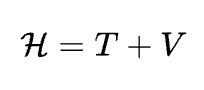


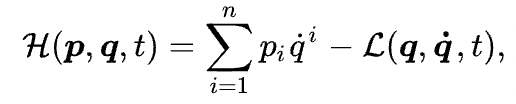

In [55]:
H = T + V 
H.simplify()

m*(-g*(cos(\theta(t)) - 1) + 0.5*Derivative(\theta(t), t)**2)

In [56]:
H

g*m*(1 - cos(\theta(t))) + 0.5*m*(sin(\theta(t))**2*Derivative(\theta(t), t)**2 + cos(\theta(t))**2*Derivative(\theta(t), t)**2)

$p_{i}$ = $\frac{\partial L}{\partial \theta^o}$

  $q^{.i}$ = $\frac{\partial \theta}{\partial t}$

In [57]:
H = smp.diff(L,the_d) * the_d - L
H

g*m*(1 - cos(\theta(t))) + 0.5*m*(2*sin(\theta(t))**2*Derivative(\theta(t), t) + 2*cos(\theta(t))**2*Derivative(\theta(t), t))*Derivative(\theta(t), t) - 0.5*m*(sin(\theta(t))**2*Derivative(\theta(t), t)**2 + cos(\theta(t))**2*Derivative(\theta(t), t)**2)

In [58]:
H.simplify()

m*(-g*(cos(\theta(t)) - 1) + 0.5*Derivative(\theta(t), t)**2)

# Visualization

## Sinosodial Plot

In [59]:
def dSdt(S, t):
    return [
        deriv1_f(S[1]), #dtheta/dt
        deriv2_f(g, S[0], S[1]) #domega/dt
    ]

In [60]:
t = np.linspace(0, 20, 1000)
g = 9.81
ans1 = odeint(dSdt, y0=[np.pi/7, 0], t=t) # y0 is the initial coordinate point.
ans2 = odeint(dSdt, y0=[np.pi/5, 0], t=t)

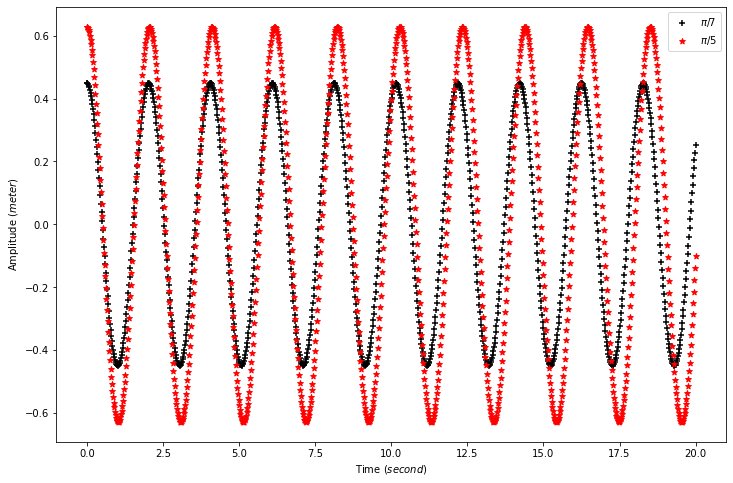

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(t,ans1.T[0],label='$\pi/7$',marker='+',color='k')
plt.scatter(t,ans2.T[0],label='$\pi/5$',marker='*',color='red')
plt.xlabel("Time $(second)$") 
plt.ylabel("Amplitude $(meter)$")
plt.legend()

## Animation

In [62]:
def get_xy(theta):
    return x_f(theta), y_f(theta)

In [63]:
x1, y1 = get_xy(ans1.T[0])
x2, y2 = get_xy(ans2.T[0])

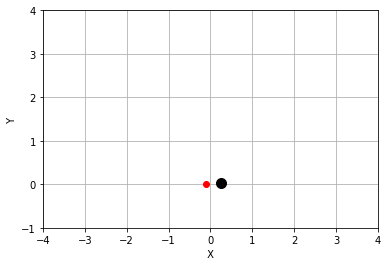

In [64]:
def animate(i):
    ln1.set_data([x1[i]], [y1[i]])
    ln2.set_data([x2[i]], [y2[i]])
    
fig, ax = plt.subplots(1,1)
ax.grid()
ln1, = plt.plot([], [],'ko--',lw=3, markersize=10)
ln2, = plt.plot([], [], 'ro')
ax.set_ylim(-1, 4)
ax.set_xlim(-4,4)
ax.set_xlabel(" X ")
ax.set_ylabel(" Y ")
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen_dv.gif',writer='pillow',fps=50)

In [65]:
'''
path='taut'
if path=='taut':
    x = smp.sin(2*the) + 2*the
    y = 1 - smp.cos(2*the)
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
if path=='parab':
    x = the
    y = the**2
    x_f = smp.lambdify(the, x)
    y_f = smp.lambdify(the, y)
'''  

"\npath='taut'\nif path=='taut':\n    x = smp.sin(2*the) + 2*the\n    y = 1 - smp.cos(2*the)\n    x_f = smp.lambdify(the, x)\n    y_f = smp.lambdify(the, y)\nif path=='parab':\n    x = the\n    y = the**2\n    x_f = smp.lambdify(the, x)\n    y_f = smp.lambdify(the, y)\n"